In [18]:
from scipy import stats
import numpy as np

rng = np.random.default_rng()
print(stats.kstest(stats.norm.rvs(size=100, random_state=rng),
             stats.norm.cdf, alternavite='twoside').pvalue.item())

TypeError: kstest() got an unexpected keyword argument 'alternavite'. Did you mean 'alternative'?

Goodness of Fit (Kolmogorov–Smirnov Test):
norm     | KS Statistic = 0.0723, p-value = 0.0001
expon    | KS Statistic = 0.2604, p-value = 0.0000
gamma    | KS Statistic = 0.0141, p-value = 0.9868
lognorm  | KS Statistic = 0.0128, p-value = 0.9959


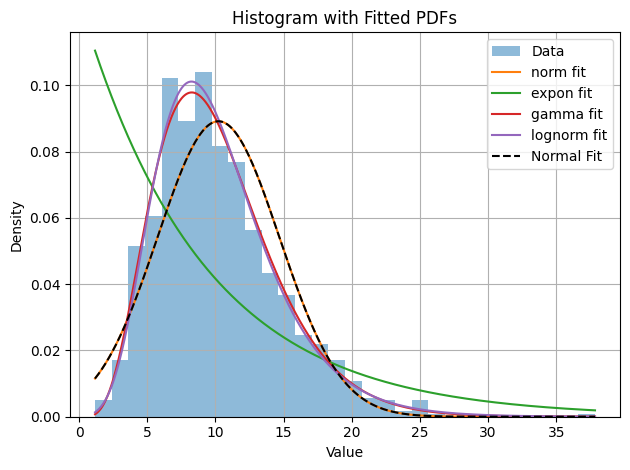

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Generate Dummy Data
np.random.seed(42)
data = np.random.gamma(shape=5, scale=2, size=1000)  # Normally distributed dummy data

# Step 2: Define Distributions to Test
distributions = ['norm', 'expon', 'gamma', 'lognorm']
results = {}

# Step 3: Fit and Test Each Distribution
for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    
    # Perform KS test
    ks_stat, p_value = stats.kstest(data, dist.cdf, args=params)
    
    # Store the results
    results[dist_name] = {
        'params': params,
        'ks_statistic': ks_stat,
        'p_value': p_value
    }

# Step 4: Print Results
print("Goodness of Fit (Kolmogorov–Smirnov Test):")
for dist_name, result in results.items():
    print(f"{dist_name:<8} | KS Statistic = {result['ks_statistic']:.4f}, p-value = {result['p_value']:.4f}")

# Step 5: Plot Histogram with PDFs
x = np.linspace(min(data), max(data), 1000)
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')

# Plot PDFs of fitted distributions
for dist_name, result in results.items():
    dist = getattr(stats, dist_name)
    pdf = dist.pdf(x, *result['params'])
    plt.plot(x, pdf, label=f"{dist_name} fit")

# Visualize the normal distribution fit specifically
normal_params = results['norm']['params']
normal_pdf = stats.norm.pdf(x, *normal_params)
plt.plot(x, normal_pdf, label="Normal Fit", linestyle='--', color='black')

plt.title("Histogram with Fitted PDFs")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
stats.kstest()